Data Collection
Dataset Description
The Desharnais dataset from Kaggle was chosen as the dataset for this project. The Desharnais dataset is a software engineering dataset from Kaggle's PROMISE Software Engineering Repository. The dataset contains 81 instances and 13 features. Each instance represents a software project, and the columns represent the project's attributes such as code size, team experience, and effort. The dataset includes the following features:

Id: Unique identifier for each project
Project: Project information
TeamExp: Experience of the development team
ManagerExp: Experience of the project manager
Year: Year the project ended, measured in years
Length: Duration of the project in months
Effort: Effort expended, measured in person-months
Transactions: Count of basic logical transactions in the system
Entities: Number of entities in the systems data model
PointsNonAdjust: Size of the project measured in adjusted function points
Adjustments: Adjustment Points
PointsAdjust: Size of the project measured in unadjusted function points
Language: Programming languages used in the project expresses as 1, 2 or 3
Data Source
The data was obtained from the Kaggle website.

Data Format
The dataset is provided in a CSV format with 81 rows and 13 columns. Each row corresponds to a project, and each column represents a feature of the project as described above. The CSV file was downloaded and saved locally on my machine for further processing.

Data Import
The Pandas library is a widely-used tool for data manipulation and analysis in Python. To import the dataset into our analysis, we utilized the read_csv function provided by Pandas. This function allowed us to load the data directly into a Pandas DataFrame, which we named 'projects' for our analysis.


In [10]:
import pandas as pd
projects = original_dataset = pd.read_csv("desharnais.csv")

A Pandas DataFrame as mentioned above is a heterogenous two dimensional data structure with labeled rows and columns .i.e. a collection of several panda series all sharing the same index. A dataframe is very similar to a spreadsheet or relational database table.

A Pandas Series on the other hand is a heterogenous one dimensional array holding any data type.

These terms (DataFrame and Series) will be used for data analysis and manipulation to gain further insights.

To gain a preliminary understanding of the dataset, an examination of the first few rows is in order. This step allows for an initial glimpse into the structure and content of the dataset, paving the way for deeper analysis and interpretation.

In [11]:
projects.head()


,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


The head() method is a useful tool for examining the contents of a DataFrame. By default, it displays the first five rows of the dataset. To display a different number of rows, an argument specifying the desired number can be passed to the method, as applied to the 'projects' DataFrame.

In [12]:
projects = projects.rename(columns={'PointsAjust': 'PointsAdjust'})

projects.head(20)

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAdjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1
5,6,6,0,0,86,4,2821,97,89,186,38,192,1
6,7,7,2,1,85,9,2569,119,42,161,25,145,2
7,8,8,1,2,83,13,3913,186,52,238,25,214,1
8,9,9,3,1,85,12,7854,172,88,260,30,247,1
9,10,10,3,4,83,4,2422,78,38,116,24,103,1


Taking a closer look at the first 20 rows our dataset, we can notice that there is a clear difference between the values in the effort feature of instances 2 and 19 respectively amongst the other instances. These are known as Outliers.

Outliers manifest as instances with characteristics different from most other instances or as values of a feature that are unusual with respect to the typical values of a feature. In short, Outliers are data points significantly different from other observations in the dataset.
In the subsequent sections, possible approaches to address the challenges associated with missing data and outliers in the dataset are examined.

Data Exploration
Overview
The first step in exploring any dataset is to get an overall understanding of the data. This includes information such as the number of rows and columns, the types of data, and the presence of missing, inconsistent, or duplicate values in the dataset. In this section, I used the Pandas library to get this information.

Number of Rows and Columns:
To get this information, I used the shape attribute of the projects dataframe to give an overview of how much data is in the dataset

In [13]:
projects.shape


(81, 13)

The output (81, 13) returned by the shape attribute of the projects dataframe indicates that the dataset contains 81 rows and 13 columns. This means that there are 81 instances or observations in the dataset and each instance has 13 features or variables. Understanding the shape of the dataset is important as it gives an idea of the size of the dataset and the number of observations and features that we are working with. This information is critical for making decisions on data processing, model selection and data visualization. It will also help in identifying any issues related to the size of the dataset or the number of features that to work with.

Types of Data:
To gain insight into the nature of the data in the dataset, an investigation into the data types and completeness of the DataFrame is warranted. To accomplish this, the info() method was employed. By calling this method, a summary of the DataFrame is obtained, which includes the number of non-null values and the data type of each column. Such information enables the identification of columns that may require conversion to a different data type, as well as the detection of any missing data that may require attention.

In [14]:
projects.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               81 non-null     int64
 1   Project          81 non-null     int64
 2   TeamExp          81 non-null     int64
 3   ManagerExp       81 non-null     int64
 4   YearEnd          81 non-null     int64
 5   Length           81 non-null     int64
 6   Effort           81 non-null     int64
 7   Transactions     81 non-null     int64
 8   Entities         81 non-null     int64
 9   PointsNonAdjust  81 non-null     int64
 10  Adjustment       81 non-null     int64
 11  PointsAdjust     81 non-null     int64
 12  Language         81 non-null     int64
dtypes: int64(13)
memory usage: 8.4 KB


Each column has a data type of int64 .i.e signed integer values, and there are no missing values (non-null) in any of the columns. The memory usage of the dataset is 8.4 KB. This means that the dataset is relatively small and can be easily loaded into memory for further analysis.

Presence of Missing, Inconsistent, or Duplicate Values: To ensure the absence of inconsistent or duplicate values in the dataset, the describe() method was utilized to generate a summary of the numerical columns, including the count, mean, standard deviation, minimum, and maximum values. This process enables the identification of potential outliers or inconsistencies in the data.

In [15]:
projects.describe()


,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAdjust,Language
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,41.000000,2.185185,2.530864,85.740741,11.666667,5046.308642,182.123457,122.333333,304.456790,27.629630,289.234568,1.555556
std,23.526581,23.526581,1.415195,1.643825,1.222475,7.424621,4418.767228,144.035098,84.882124,180.210159,10.591795,185.761088,0.707107
min,1.000000,1.000000,-1.000000,-1.000000,82.000000,1.000000,546.000000,9.000000,7.000000,73.000000,5.000000,62.000000,1.000000
25%,21.000000,21.000000,1.000000,1.000000,85.000000,6.000000,2352.000000,88.000000,57.000000,176.000000,20.000000,152.000000,1.000000
50%,41.000000,41.000000,2.000000,3.000000,86.000000,10.000000,3647.000000,140.000000,99.000000,266.000000,28.000000,255.000000,1.000000
75%,61.000000,61.000000,4.000000,4.000000,87.000000,14.000000,5922.000000,224.000000,169.000000,384.000000,35.000000,351.000000,2.000000
max,81.000000,81.000000,4.000000,7.000000,88.000000,39.000000,23940.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000,3.000000


The output shows descriptive statistics of the numerical columns in the dataset. For instance, the 'TeamExp' and 'ManagerExp' columns have negative values which might indicate data entry errors, and some columns like the Efforts and Transactions column have significantly larger maximum values compared to their 75th percentile indicating potential outliers. In the data preparation section, normalization/standardization will be conducted to ensure that the features are on a similar scale. This process will enable the model to learn effectively, following the identification of inconsistencies in the data.

Prior to exploring the interrelationships between the various features and detecting any discernible patterns or trends in the data, an examination of the dimensionality, sparsity, and density of the dataset was conducted.

Dimensionality
The dimensionality of a dataset pertains to the number of features or attributes associated with each instance or observation. For the current dataset, it comprises of 12 features or columns (excluding ID) that describe different aspects of each project.

However, it's important to note that high-dimensional data can pose challenges for analysis and modeling. With a large number of features, there is a risk of overfitting, which occurs when a model becomes too complex and performs well on the training data but poorly on new, unseen data. To address this, techniques such as feature selection or feature extraction needs to be considered.

Feature selection
Feature selection involves choosing a subset of the most informative features to use in our analysis or modeling. This can help to reduce the dimensionality of the dataset and improve the performance of our models. Techniques such as correlation analysis, principal component analysis (PCA), or recursive feature elimination (RFE) can be used to identify the most important features.

Feature extraction
Feature extraction involves transforming the original features into a new set of features that are more suitable for analysis or modeling. This can help to reduce the dimensionality of the dataset while retaining important information. Techniques such as PCA which uses an orthogonal transformation or linear discriminant analysis (LDA) can be used to extract new features.

Sparsity and Density
Sparsity and density are two measures that describe the distribution of non-zero values in a dataset. Sparsity refers to the proportion of zero values in the dataset, while density refers to the proportion of non-zero values.

Sparsity & Density:
To calculate the sparsity and density of the dataset, I used the formula:

density = count_nonzero(X) / (n_samples * n_features)
sparsity = 1 - density
where X is the dataset, count_nonzero is a function that counts the number of non-zero values in X, n_samples is the number of instances in X, and n_features is the number of features in X.

An approach to counting the number of non-zero values in a dataset involves using the astype(bool) method to convert all non-zero values to True and zero values to False. The resulting Boolean array can then be summed using the sum() method to count the number of True values. Here is an example code snippet demonstrating this technique:

In [16]:
# Count the number of non-zero values in each column
non_zero_counts = (projects.astype(bool)).sum()

print(non_zero_counts)

id                 81
Project            81
TeamExp            74
ManagerExp         76
YearEnd            81
Length             81
Effort             81
Transactions       81
Entities           81
PointsNonAdjust    81
Adjustment         81
PointsAdjust       81
Language           81
dtype: int64


From the output above illustrating the sum of non-zero values for each column / feature out of 81 instances, TeamExp and ManagerExp columns / features have 74 and 76 non-zero values resulting in 7 and 5 zero values respectively. This means in total, there are 7 + 5 = 13 zero values in the dataset.

Therefore:

In [17]:
total_number_of_elements = projects.shape[0] * projects.shape[1]
total_number_of_non_zero_elements = (projects.astype(bool)).sum().sum()

density = total_number_of_non_zero_elements / total_number_of_elements
density_in_percentage = "{:.0%}".format(density)

sparsity = 1 - density
sparsity_in_percentage = "{:.0%}".format(sparsity)

print("Total number of elements in the dataset:", total_number_of_elements)
print("Total number of non-zero elements in the dataset:", total_number_of_non_zero_elements)

print()

print(f'Density: {density}')
print(f'Density (%): {density_in_percentage}')

print()

print(f'Sparsity: {sparsity}')
print(f'Sparsity (%): {sparsity_in_percentage}')

Total number of elements in the dataset: 1053
Total number of non-zero elements in the dataset: 1041

Density: 0.9886039886039886
Density (%): 99%

Sparsity: 0.01139601139601143
Sparsity (%): 1%


A high sparsity value indicates that the dataset has a large number of zero elements, while a high density value indicates that the dataset has a large number of non-zero elements.

The high density (99%) of the dataset, which indicates a low proportion of missing values, is generally a positive characteristic as it suggests that the dataset is relatively complete and contains a large amount of available information. However, the low sparsity of the dataset means that there is little diversity or variability in the data most likely in the TeamExp and ManagerExp features as identifeid in the Summary Statistics, and this could potentially limit the types of insights and patterns that can be derived from the data.

Data Visualization
This section of the analysis focuses on exploring the relationships between features, comparing different subsets of the data, analyzing the distribution of individual features, and examining the composition of categorical features. To aid in this exploration and analysis, a variety of visualizations have been employed to provide insight into patterns and trends in the dataset.

To ensure that these visualizations are displayed properly within the notebook interface, the command %matplotlib inline will be executed. This command enables the direct display of plots and graphs within the notebook for ease of reference during analysis.

In [18]:
%matplotlib inline


Relationship Visualization

<Axes: title={'center': 'Relationship between Effort and PointsAdjusted'}, xlabel='Effort', ylabel='PointsAdjust'>

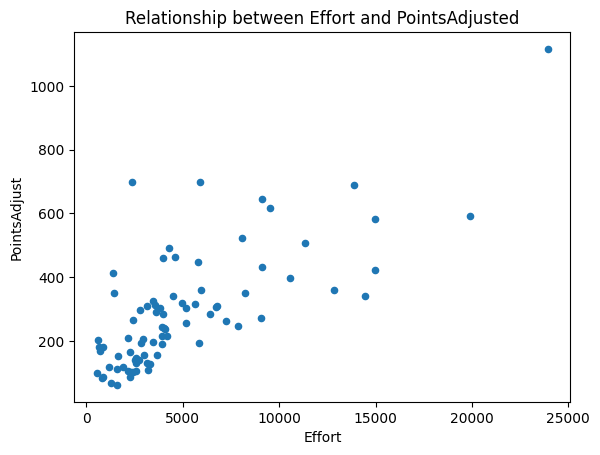

In [19]:
# Create scatter plot
projects.plot(kind = 'scatter', x = 'Effort', y = 'PointsAdjust', title = 'Relationship between Effort and PointsAdjusted')

This code creates a scatter plot using the 'plot' function in pandas, with the 'kind' parameter set to 'scatter'. The 'x' and 'y' parameters specify which columns in the 'projects' dataset to use for the x and y axes, respectively. The 'title' parameter sets the title of the plot to "Relationship between Effort and PointsAdjusted". The resulting scatter plot shows the relationship between the 'Effort' and 'PointsAdjusted' features in the 'projects' dataset.

The scatter plot shows a positive linear relationship between 'Effort' and 'PointsAdjusted'. This indicates that as the effort put into the project increases, so does the adjusted points. However, there are a few outliers where a high amount of effort did not result in a proportionate increase in adjusted points.

Comparison Visualization

              Effort
YearEnd             
82       9520.000000
83       3045.000000
84       3701.833333
85       5792.500000
86       5203.857143
87       4938.500000
88       3145.200000


<Axes: title={'center': 'Effort by Year'}, xlabel='YearEnd'>

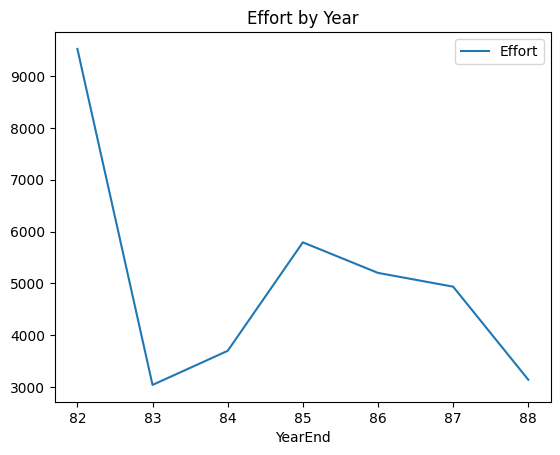

In [20]:
pivot_table = projects.pivot_table(index='YearEnd', values='Effort', aggfunc='mean')
print(pivot_table)

pivot_table.plot(kind='line', title='Effort by Year')

Based on the line chart, there was a general trend of increasing effort from 1983 to 1985, followed by a slight decrease in 1986 and 1987, and then a further decrease in 1988. The highest effort was recorded in 1982 with a value of 9520, while the lowest effort was recorded in 1983 with a value of 3045. This information can be useful for training a model to predict future effort requirements for projects based on historical trends.

Distribution Visualization

<Axes: title={'center': 'Distribution of Effort'}, ylabel='Frequency'>

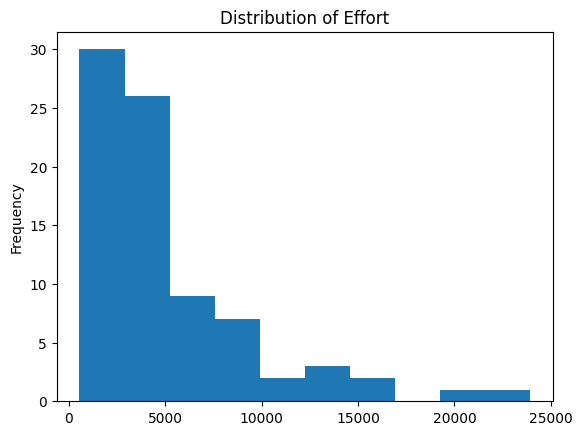

In [21]:
projects['Effort'].plot(kind='hist', bins=10, title='Distribution of Effort')


Based on the histogram, it appears that the majority of projects have an effort level between 0 and 5000, with a smaller number of projects having lower effort levels.

Composition Visualization

In [22]:
projects.pivot(columns = 'TeamExp', values = 'Effort')


TeamExp,-1,0,1,2,3,4
0,NaN,NaN,5152.0,NaN,NaN,NaN
1,NaN,5635.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,805.0
3,NaN,3829.0,NaN,NaN,NaN,NaN
4,NaN,2149.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
76,NaN,NaN,NaN,NaN,NaN,1400.0
77,NaN,NaN,NaN,NaN,NaN,2800.0
78,NaN,NaN,NaN,NaN,NaN,9520.0
79,NaN,NaN,NaN,NaN,NaN,5880.0


<Axes: >

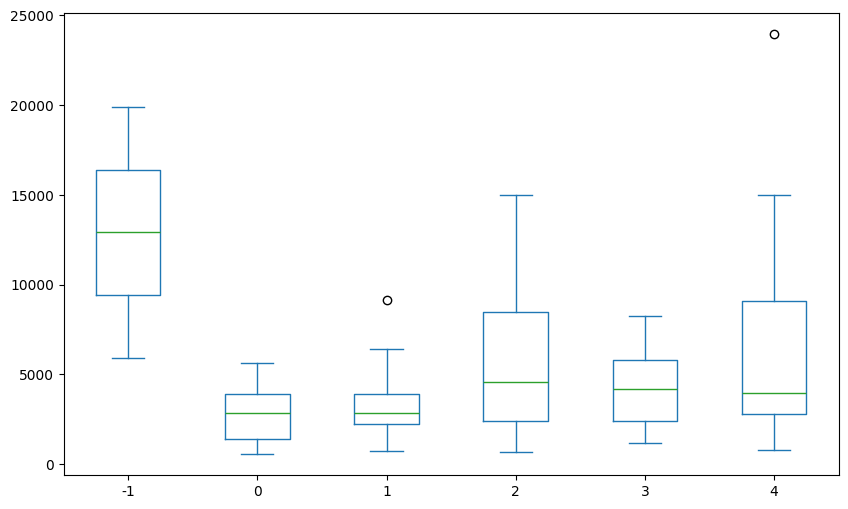

In [23]:
projects.pivot(columns = 'TeamExp', values = 'Effort').plot(kind = 'box', 
                                                                figsize = (10, 6))

Based on these visualizations, I made the following general findings:

There is a positive linear relationship between the 'Effort' and 'PointsAdjusted' features, which means that as 'Effort' increases, 'PointsAdjusted' also tends to increase.
There is a clear upward trend in 'Effort' over the years, indicating an increase in effort put into projects over time.
The 'Effort' feature follows a roughly normal distribution, with a peak around 5000.
There is no clear relationship between 'TeamExp', and 'Effort', and further analysis would be required to determine any potential relationships.
Overall, the data exploration section provides valuable insights into the relationships and distributions of the various features, which can inform further analysis and decision-making.

Data Preparation
After completing the data exploration phase, the next step is to prepare the data for modeling. This includes handling missing or inconsistent data, feature engineering, and scaling the data if necessary.

Handling Missing Data
One common issue encountered during the Data Preparation phase is missing data. Missing data can occur for many reasons, such as data not being collected, data being lost during storage, or data being corrupted. Handling missing data is important because it can affect the accuracy and validity of my analysis.

To detect any missing data in the dataset, the following code was executed:

In [24]:
projects.isnull().sum()


id                 0
Project            0
TeamExp            0
ManagerExp         0
YearEnd            0
Length             0
Effort             0
Transactions       0
Entities           0
PointsNonAdjust    0
Adjustment         0
PointsAdjust       0
Language           0
dtype: int64

The panda series above shows that there are no missing values in any of the columns, as all the values are 0. This means that there are no missing data points in the dataset, which is a good thing for data analysis.

Feature Engineering
Since there are no missing data, the next step is Feature Engineering. Feature engineering involves transforming and selecting features to improve the performance of a machine learning model. Reducing complexity in the dataset avoids the curse of dimensionality.

Curse of Dimensionality: a phenomenom in machine learning that describes the eventual reduction in the performance of a model as the dimensionality of the training data increases.

As complexity (p) increases, the amount of data (n) needed to generalize accurately grows exponentially. Specifically, as the number of features used to build the model, the number of training data has to increase.

If (n) is constant, performance will eventually diminish as (p) increases. If this is not done, the performance of the model will eventually degrade.

This necessitates that the optimal number of features to be used should be identified which is done in the Feature Selection approach below.

Feature Selection

In [25]:
projects.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               81 non-null     int64
 1   Project          81 non-null     int64
 2   TeamExp          81 non-null     int64
 3   ManagerExp       81 non-null     int64
 4   YearEnd          81 non-null     int64
 5   Length           81 non-null     int64
 6   Effort           81 non-null     int64
 7   Transactions     81 non-null     int64
 8   Entities         81 non-null     int64
 9   PointsNonAdjust  81 non-null     int64
 10  Adjustment       81 non-null     int64
 11  PointsAdjust     81 non-null     int64
 12  Language         81 non-null     int64
dtypes: int64(13)
memory usage: 8.4 KB


Reviewing the dataset above one more time, the id is not relevant to the analysis and will be removed. The Project feature as well deems unnecessary since the project name is not expected to have a significant prediction of project effort. Therefore, both of these features will be removed from the dataset.

In [26]:
# Drop the 'id' and 'Project' features
projects.drop(['id', 'Project'], axis=1, inplace=True)

projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   TeamExp          81 non-null     int64
 1   ManagerExp       81 non-null     int64
 2   YearEnd          81 non-null     int64
 3   Length           81 non-null     int64
 4   Effort           81 non-null     int64
 5   Transactions     81 non-null     int64
 6   Entities         81 non-null     int64
 7   PointsNonAdjust  81 non-null     int64
 8   Adjustment       81 non-null     int64
 9   PointsAdjust     81 non-null     int64
 10  Language         81 non-null     int64
dtypes: int64(11)
memory usage: 7.1 KB


The rest of the features above will be used to train the model.

Feature Extraction
A thorough analysis was carried out on the data to identify any potential opportunities for feature extraction, but unfortunately, no obvious features that could be extracted from the existing data were found.

Feature Transformation and Normalization
Certainly! There are several transformation and normalization techniques that can be applied to prepare data for machine learning algorithms. Some of the common techniques include:

Min-Max Scaling: This is a technique that scales features to be in a range between 0 and 1. It is calculated as (x - min) / (max - min), where x is the feature value, min is the minimum value of the feature, and max is the maximum value of the feature.
Z-Score or Standardization: This technique standardizes the features to have zero mean and unit variance. It is calculated as (x - mean) / std_dev, where x is the feature value, mean is the mean value of the feature, and std_dev is the standard deviation of the feature.
Log Transformation: This technique is used to transform skewed data into a more Gaussian-like distribution. It is calculated as the natural logarithm of the feature values such that v′ = log(v). This works only for values that are positive
Box-Cox Transformation: This is a more generalized transformation technique that can transform data into a Gaussian-like distribution for any value of lambda. It is calculated as (x^lambda - 1) / lambda, where x is the feature value and lambda is the parameter that can be estimated using optimization.
Z-Score & Min-Max Normalization* are usually suitable when there are no significant outliers in the dataset. If there are any outliers, a more suitable approach is log transformation.

As mentioned earlier in the data collection section, it was noted that there are outliers in the Effort feature of our dataset based on a value significantly different from the rest, as well as other features with values in hundreds and thousands. To mitigate this issue, a logarithmic transformation was implemented to minimize the gap between the outlier values and the other values in the dataset.

Below are distribution plots of the Effort, Length, Transactions, Entities, PointsNonAdjust, Adjustment, and PointsAjust features before log transformation.

Text(0.5, 1.0, 'PointsAdjust Distribution Before Transformation')

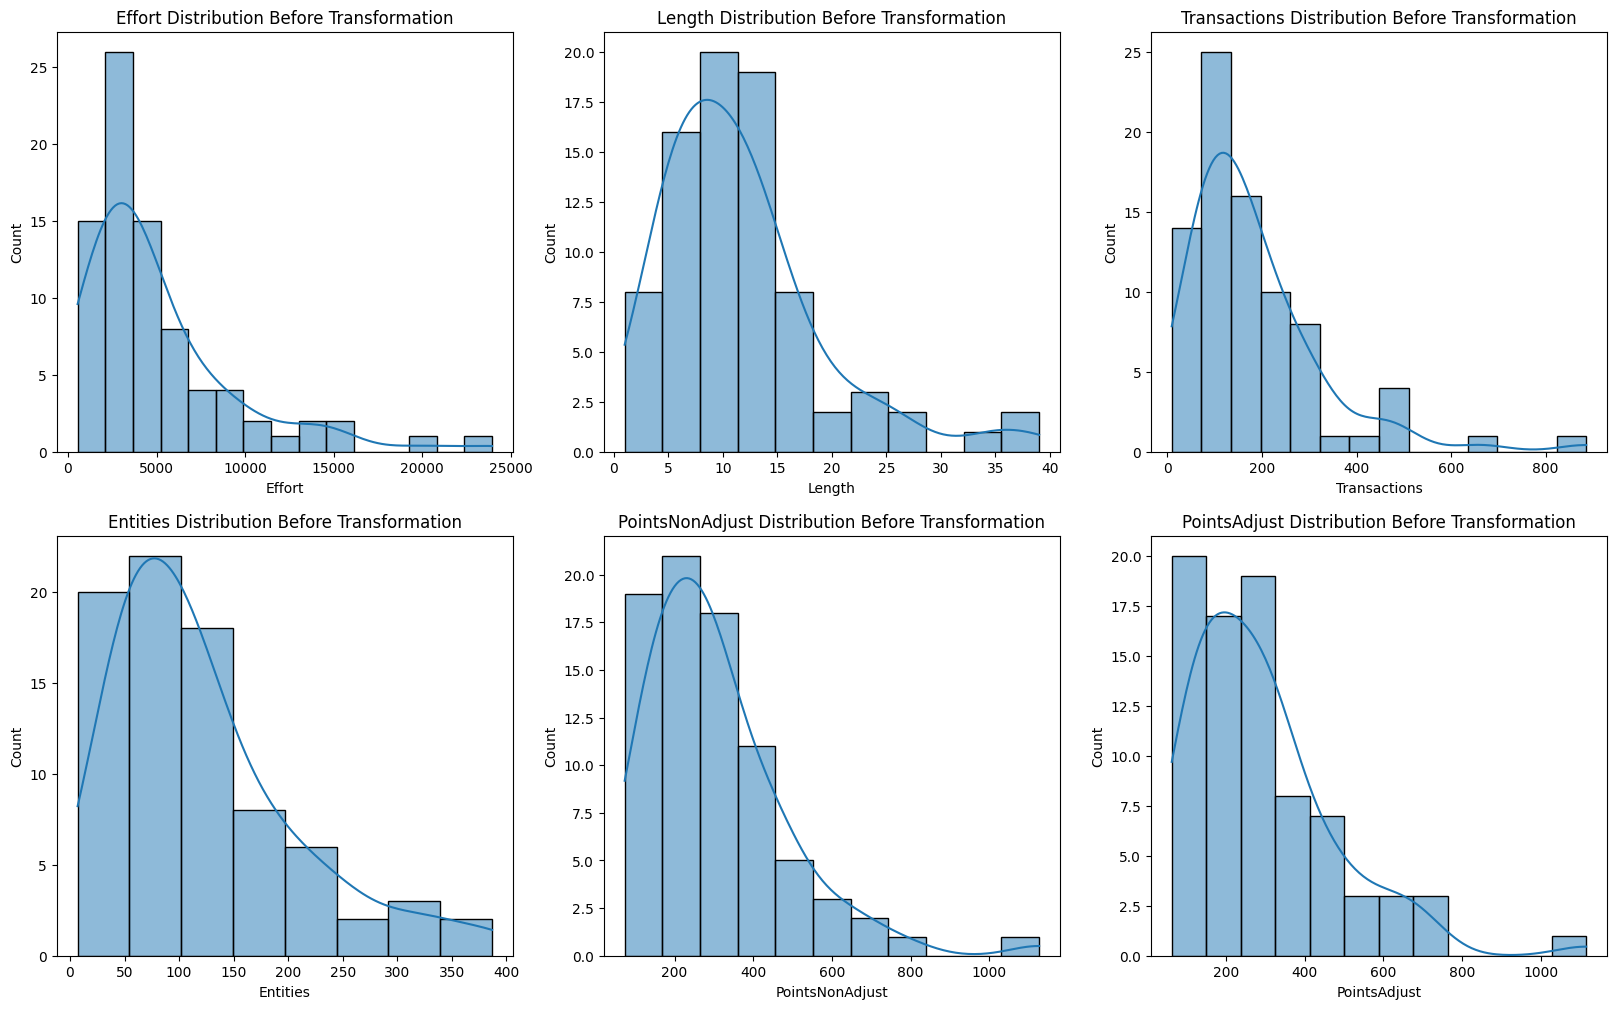

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Distribution plots before transformation
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
sns.histplot(ax=ax[0, 0], data=projects, x='Effort', kde=True)
sns.histplot(ax=ax[0, 1], data=projects, x='Length', kde=True)
sns.histplot(ax=ax[0, 2], data=projects, x='Transactions', kde=True)
sns.histplot(ax=ax[1, 0], data=projects, x='Entities', kde=True)
sns.histplot(ax=ax[1, 1], data=projects, x='PointsNonAdjust', kde=True)
sns.histplot(ax=ax[1, 2], data=projects, x='PointsAdjust', kde=True)
ax[0, 0].set_title('Effort Distribution Before Transformation')
ax[0, 1].set_title('Length Distribution Before Transformation')
ax[0, 2].set_title('Transactions Distribution Before Transformation')
ax[1, 0].set_title('Entities Distribution Before Transformation')
ax[1, 1].set_title('PointsNonAdjust Distribution Before Transformation')
ax[1, 2].set_title('PointsAdjust Distribution Before Transformation')

Before the transformation, the data had a skewed distribution, with most of the values concentrated in the lower end of the scale and a few very large values (outliers) on the higher end.

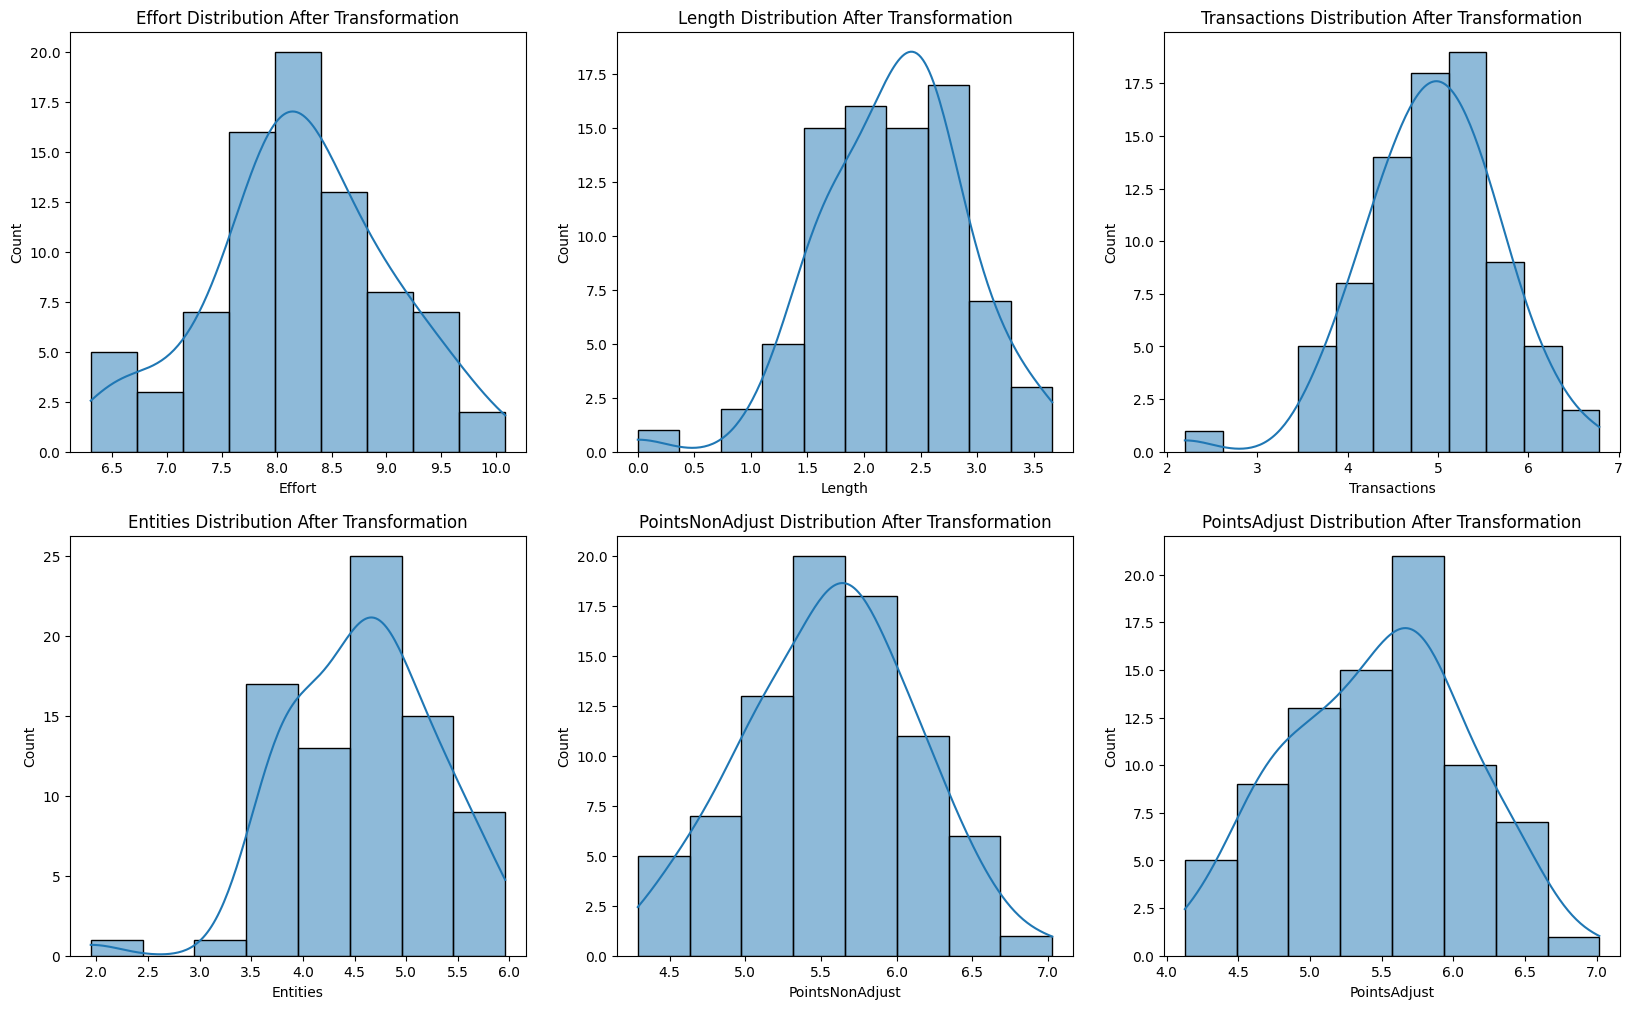

In [28]:
# Log-transform certain features
cols_to_log_transform = ['Effort', 'Length', 'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAdjust']
projects[cols_to_log_transform] = np.log(projects[cols_to_log_transform])

# Distribution plots after transformation
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
sns.histplot(ax=ax[0, 0], data=projects, x='Effort', kde=True)
sns.histplot(ax=ax[0, 1], data=projects, x='Length', kde=True)
sns.histplot(ax=ax[0, 2], data=projects, x='Transactions', kde=True)
sns.histplot(ax=ax[1, 0], data=projects, x='Entities', kde=True)
sns.histplot(ax=ax[1, 1], data=projects, x='PointsNonAdjust', kde=True)
sns.histplot(ax=ax[1, 2], data=projects, x='PointsAdjust', kde=True)
ax[0, 0].set_title('Effort Distribution After Transformation')
ax[0, 1].set_title('Length Distribution After Transformation')
ax[0, 2].set_title('Transactions Distribution After Transformation')
ax[1, 0].set_title('Entities Distribution After Transformation')
ax[1, 1].set_title('PointsNonAdjust Distribution After Transformation')
ax[1, 2].set_title('PointsAdjust Distribution After Transformation')
plt.show()

After applying the log transformation, the data is more evenly distributed, with the outliers being brought closer to the rest of the values. This helps to reduce the effect of extreme values on the analysis and modeling, and makes the data more suitable for certain statistical tests and models that assume a normal distribution.

The features TeamExp, ManagerExp, and Language were normalized using the z-score normalization approach to ensure that their values were on a comparable scale.

In [29]:
# Normalize certain features
cols_to_normalize = ['TeamExp', 'ManagerExp', 'Language']

# mean and std_dev before normalization
projects[cols_to_normalize].describe()

,TeamExp,ManagerExp,Language
count,81.000000,81.000000,81.000000
mean,2.185185,2.530864,1.555556
std,1.415195,1.643825,0.707107
min,-1.000000,-1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,3.000000,1.000000
75%,4.000000,4.000000,2.000000
max,4.000000,7.000000,3.000000


In [30]:
To normalize the features, I made use of the StandardScaler method from sklearn preprocessing library

SyntaxError: invalid syntax (983587145.py, line 1)

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
projects[cols_to_normalize] = StandardScaler().fit_transform(projects[cols_to_normalize])
projects[cols_to_normalize].describe()

Now, the mean of the normalized features is centered around 0 and their standard deviation is 1.

However, the Language feature has a mean of 1 after normalization, which is an indication of a potential error in the data.

In [ ]:
languages_freq = original_dataset['Language'].value_counts()
plt.bar(languages_freq.index, languages_freq.values)
plt.title('Frequency of Programming Languages')
plt.xlabel('Programming Languages')
plt.ylabel('Frequency')
plt.show()

Taking a closer look at the Language feature in the original dataset, I discovered that majority of the projects had a constant value of 1 with a maximum value of 3 which is already close to a standard normal distribution.

The normalization process improved the overall quality of the data by reducing the range of the features and making them more comparable.

Sampling
In machine learning, the dataset is split into two parts: the training set and the test set. The training set is used to train the model, and the test set is used to evaluate the model's performance on unseen data. This step is essential to evaluate the model's generalization ability and prevent overfitting.

In Python, we can use the train_test_split function from the sklearn.model_selection module to split the dataset into training and testing sets. The function randomly splits the dataset into two parts, with a specified ratio, where one part is used for training and the other part for testing.

Here's the code to split the dataset into training and testing sets:

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = projects.drop('Effort', axis=1)
y = projects['Effort']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In this code, we first split the dataset into the feature matrix X and target variable y. We then use the train_test_split function to split the dataset into a training set and a test set, with a test size of 30% and a random state of 42. The random_state parameter ensures that the split is reproducible.

Effort is excluded from the feature matrix X because it is the target variable we are trying to predict in our machine learning model. We want to train our model to predict the effort required for a software project based on the other features. Therefore, including the Effort feature in the training data would lead to data leakage, where the model would have access to the target variable during training, leading to overfitting and inaccurate performance evaluation.

Now, we have X_train, X_test, y_train, and y_test datasets, which we can use to train and test our machine learning model.

The shapes of the resulting training and test datasets are outlined below:

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Modeling
The next step in the machine learning pipeline is to create a predictive model using the preprocessed data. In this project, I will be using a linear regression model to predict the effort required for a software project. I will be using scikit-learn's LinearRegression class to create our model.

Linear Regression
Linear regression is a commonly used technique in predictive modeling for continuous outcomes. It is a simple and interpretable model that can provide insights into the relationships between the target variable and the predictor variables. It is also widely used in various fields and has been well-studied and understood for over a century. The coefficients of the model can be easily interpreted to identify which predictors have the greatest impact on the target variable, providing valuable insights into the problem being modeled. Therefore, using a linear regression model can provide more credibility and interpretability to the modeling process for the current dataset.

Here is the code used to create the model:

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

In [ ]:
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
The first step is to import the LinearRegression class from the sklearn.linear_model module. Next, an instance of the LinearRegression class is created and stored in the variable model. Finally, the fit method is used to train the model on the training data by passing in the feature matrix X_train and the target vector y_train.

To obtain the intercept and coefficients of the linear regression model, the intercept_ and coef_ attributes of the fitted model were utilized.

In [ ]:
# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Here is an example code snippet to get the corresponding coefficient for each feature:



In [ ]:
# Create a dictionary with feature names and their corresponding coefficients
coef_dict = dict(zip(X.columns, coefficients))

# Print the dictionary
for key, value in coef_dict.items():
    print(f"{key}: {value}")

The model coefficients correspond to the order in which the independent variables are listed in the training data. This means that the equation for the fitted regression line can be written as:

y = 0.91 - (0.07 * TeamExp) - (0.03 * ManagerExp) + (0.06 * YearEnd) + (0.31 * Length) + (0.58 * Transactions) + (0.3 * Entities) - (3.74 * PointsNonAdjust) - (0.65 * Adjustment) + (3.61 * PointsAdjust) - (0.3 * Language)

Where:

TeamExp: Team experience in years
ManagerExp: Manager experience in years
YearEnd: Year end
Length: Project length in months
Transactions: Number of transactions (size)
Entities: Number of entities (size)
PointsNonAdjust: Non-adjusted function points (size)
Adjustment: Developer-adjusted function points (size)
PointsAdjust: Modified function points (size)
Language: Number of Programming languages used
Below is a function in python of the linear regression equation using the model coefficients:

In [ ]:
def predict_effort(project_details):
    """
    This function takes in a dictionary of project details and returns the predicted effort
    based on the linear regression equation we obtained earlier.
    """
    
    # get the features from the X train DataFrame
    features = X.columns
    
    # calculate the sum of each feature multiplied by its corresponding coefficient
    sum_of_products = sum([coeff * project_details[feature] for coeff, feature in zip(coefficients, features)])

    # add the intercept to the sum of products to get the predicted effort
    predicted_effort = intercept + sum_of_products

    return predicted_effort

In [ ]:
new_project = {'TeamExp': 1, 'ManagerExp': 4, 'YearEnd': 85, 'Length': 12, 'Transactions': 253,
                'Entities': 52, 'PointsNonAdjust': 350, 'Adjustment': 34, 'PointsAdjust': 302, 'Language': 1}

predicted_effort = predict_effort(new_project)
print(predicted_effort)

Evaluation
After fitting the Linear Regression model on the training set, it is important to evaluate the model's performance to determine its accuracy in predicting the effort required for a software project. Several quantitative methods can be used to evaluate the model, including Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

MAE represents the average absolute difference between the predicted values and the actual values of the target variable. The formula for MAE is:
     MAE = (1/n) * Σ|y_true - y_pred|
     where y_true represents the actual values of the target variable, y_pred represents the predicted values of the target variable, and n is the number of observations.

MSE represents the average of the squared differences between the predicted values and the actual values of the target variable. The formula for MSE is:      MSE = (1/n) * Σ(y_true - y_pred)^2


RMSE is the square root of MSE and represents the average absolute difference between the predicted values and the actual values of the target variable. The formula for RMSE is:      RMSE = sqrt((1/n) * Σ(y_true - y_pred)^2)


In addition to these methods, R-squared (R^2) can also be used to evaluate the model's performance. R^2 measures the proportion of the variance in the target variable that is explained by the independent variables. R^2 values range from 0 to 1, with 1 indicating a perfect fit.

To evaluate the Linear Regression model, I used the mean_absolute_error, mean_squared_error, and r2_score functions from the scikit-learn metrics module. These functions take the actual values of the target variable and the predicted values of the target variable as input and return the corresponding evaluation metrics.

Here is an example of how to evaluate the linear regression model using these metrics:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

From the output above, the mean squared error (MSE) was 0.462, indicating that on average, the predicted effort values differed from the actual values by approximately 0.68. The root mean squared error (RMSE) was 0.68, which means that the model's predictions were off by an average of 0.68 units of effort. The mean absolute error (MAE) was 0.55, which means that the predicted effort values differed from the actual values by an average of 0.55 units of effort.

The R-squared value of 0.45 indicates that the model explains approximately 45% of the variation in the data. This value is not particularly high, indicating that the model may not be the best fit for the data.

Based on these results of the model, it can be inferred that the model did not perform optimally in predicting the effort values of the software projects. To improve the model's predictive accuracy, it is recommended to remodel using reduced features that are more significant to a good prediction.

The model used several features that may not have a strong correlation with the target variable, which could result in noisy predictions. Therefore, it is essential to select only the most relevant features that have a significant impact on the target variable to improve the model's performance.

By selecting features that have a strong correlation with the target variable, the model can learn more meaningful patterns and make more accurate predictions. This process of feature selection is critical in developing a robust and accurate machine learning model.

Model Improvement (Reduced Features)
This time, we will only use the following features: TeamExp, ManagerExp, YearEnd, and Length on the original dataset following the same procedure as before:

Starting with splitting the data into training and test sets
Fitting the model on the training data
Getting the intercept and coefficients of the linear regression model
Use the model to predict Effort for the test set
Evaluate the performance based on the same metrics

In [ ]:
# Select the relevant features
X = original_dataset[['TeamExp', 'ManagerExp', 'YearEnd', 'Length']]
y = original_dataset['Effort']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression class and fit the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Get the intercept and coefficients of the linear regression model
intercept = model.intercept_
coefficients = model.coef_

# Print the equation of the fitted line
print('Equation of the fitted line:')
print('Effort = {0:.2f} + ({1:.2f} * TeamExp) + ({2:.2f} * ManagerExp) + ({3:.2f} * YearEnd) + ({4:.2f} * Length)'.format(intercept, coefficients[0], coefficients[1], coefficients[2], coefficients[3]))
print()

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model using Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R-squared: ', r2)

Equation of the fitted line:
Effort = -2212.38 + (129.69 * TeamExp) + (-63.46 * ManagerExp) + (25.49 * YearEnd) + (419.08 * Length)

MSE:  5952319.317112569
RMSE:  2439.7375508674227
MAE:  1975.1344314146525
R-squared:  0.5334717196927032
Based on the output above, the mean squared error (MSE) of the remodeled linear regression model is 5,952,319.31, indicating that on average, the predicted effort values differ from the actual values by approximately 2,439.74 units of effort. The root mean squared error (RMSE) is 2,439.74, which means that the model's predictions are off by an average of 2,439.74 units of effort. The mean absolute error (MAE) is 1,975.13, which means that the predicted effort values differ from the actual values by an average of 1,975.13 units of effort. Going forward, the performance of the model will be off the mark at an average of about plus or minus 1975.

The R-squared value of 0.53 indicates that the remodeled linear regression model explains approximately 53% of the variation in the data, which is an improvement from the previous model which is as a reduction in dimensionality of the dataset to train the model only based on significant features relative to the number of instances.

Although the remodeled linear regression model showed a significant improvement in predictive accuracy over the initial model, further improvements can still be made. One possible avenue for improvement is to gather more data to train the model. Increasing the size of the dataset can help the model learn more patterns and relationships, which can lead to more accurate predictions.

In addition to increasing the size of the dataset, adding new features can also improve the model's accuracy. Some significant features that can be measured in numbers and may be relevant to software development effort estimation include:

Lines of code (LOC)
Number of defects / bugs reported
Code complexity (e.g., cyclomatic complexity)
Team size
Number of features implemented
Customer satisfaction score (on a scale from 1 to 5)
Number of test cases
Adding some or all of these features to the dataset can help the model better capture the complexity of software development projects and produce more accurate effort estimates.

Overall, the improved performance of the remodeled linear regression model is a significant advancement in software development effort prediction research. The next step is to integrate the model into the development process and continuously evaluate its performance to ensure that it remains accurate and relevant.

Actionable Insight
Finally, to make the effort estimation process more user-friendly and accessible, the linear regression model can be integrated into a terminal-based application that prompts users to input the required features and returns an effort estimate based on the trained model. This would make it easier for software developers to quickly estimate the effort required for a given project and make more informed decisions about project planning and resource allocation. To integrate the trained model into the development process, the following steps can be taken:

Save the trained model to disk using a library such as scikit-learn's joblib
Integrate the saved model into the development process by creating an API endpoint that accepts input data in the form of feature values, and returns the predicted effort value as output.
Develop a terminal-based application that reloads the saved model upon startup and prompts the user to enter the required feature values. The application should then make use of the model to predict the effort required for the project.
Build a GUI that works with the API endpoint, allowing project managers to easily input the relevant feature values for a given software development project and receive an estimated effort value.
Saving the Trained Model
To use the trained linear regression model for prediction in a different context, such as in a terminal-based or GUI application, it is necessary to save the model to disk. This can be done using a library such as scikit-learn's joblib, which provides a convenient way to save and load Python objects including machine learning models.

To save the trained model, the joblib.dump() function is used, which takes two arguments: the object to save (the trained model in this case), and the filename to save it to.

In [ ]:
import joblib

try:
    joblib.dump(model, 'linear_regression_model.joblib')
    print("Model saved successfully.")
except Exception as e:
    print("Error while saving the model:", e)

This will save the trained model as a file named 'linear_regression_model.joblib' in the current directory. The saved model can then be loaded into memory in another Python script using the joblib.load() function:

In [ ]:
import joblib

# load the saved model from file
model = joblib.load('linear_regression_model.joblib')

predicted_effort = model.predict([[1, 4, 85, 12]])
print(predicted_effort[0])

Terminal Based Application
To facilitate easy use of the trained model, a terminal-based application can be developed that allows the user to input the required feature values and receive a prediction for the effort required for the project. Below is the code implementation to create this application:

In [ ]:
model = joblib.load("linear_regression_model.joblib")

def get_input():
    team_exp = float(input("Enter team experience (in years): "))
    manager_exp = float(input("Enter manager experience (in years): "))
    year_end = int(input("Enter year-end (e.g. 85 for 1985): "))
    length = int(input("Enter length of project (in months): "))
    return np.array([team_exp, manager_exp, year_end, length]).reshape(1, -1)

def predict_effort():
    input_data = get_input()
    prediction = model.predict(input_data)
    print(f"The predicted effort required for the project is {prediction[0]:.2f} person-months.")

predict_effort()

Here,

The model object is loaded from the saved file linear_regression_model.joblib using the joblib.load() method.
The get_input() function prompts the user to enter the required feature values for a software development project, namely team_exp, manager_exp, year_end, and length, and returns a NumPy array of the values in the required format, i.e., a 2D array with one row and four columns using the reshape() method.
The predict_effort() function calls the get_input() function to get the feature values from the user and then uses the loaded model to predict the effort required for the project by calling the predict() method on the model object and passing the input data. The predicted effort value is stored in the prediction variable.
The predicted effort value is then printed to the console using the print() function with a formatted string that includes the predicted effort value with 2 decimal places.
The predict_effort() function is called at the end to execute the prediction functionality.
Integrating Model with API

In [ ]:
from flask import Flask, jsonify, request
import joblib

app = Flask(__name__)
model = joblib.load("linear_regression_model.joblib")

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json(force=True)
        team_exp = float(data['TeamExp'])
        manager_exp = float(data['ManagerExp'])
        year_end = int(data['YearEnd'])
        length = int(data['Length'])

        # Input validation checks
        if team_exp < 0 or manager_exp < 0 or year_end < 0 or length < 0:
            raise ValueError('All input values must be positive')
            
        prediction = model.predict([[team_exp, manager_exp, year_end, length]])
        return jsonify({'prediction': list(prediction)})
    except (ValueError, KeyError, TypeError):
        # Error handling - returns a 400 Bad Request response
        return jsonify({'error': 'Invalid input data'}, 400)

if __name__ == '__main__':
    app.run(port=5000, debug=True)

In [ ]:
if __name__ == '__main__':
    app.run(port=5000, debug=True, use_reloader=False)


This code creates an API endpoint using Flask that accepts input data for a software development project and returns the predicted effort value as output using a pre-trained linear regression model. The endpoint is hosted on port 5000 and can be accessed via a POST request to the '/predict' route.

The predict() function is the main function in the code that handles the incoming data and generates a prediction based on the saved machine learning model.
The function is called when a POST request is made to the /predict endpoint.
The incoming data is expected to be in the form of a JSON object containing the feature values for a software development project.
The request.get_json() method is used to extract the JSON object from the request.
The feature values are then extracted from the JSON object and stored in local variables for use in the prediction.
The float() and int() functions are used to ensure that the input values are parsed correctly as numeric data types.
Input validation checks are performed to ensure that all input values are positive. If any value is negative, a ValueError is raised with an appropriate error message.
The machine learning model is loaded into memory using the joblib.load() method from the joblib library.
The loaded model is used to generate a prediction using the input feature values.
The prediction is returned as a JSON object with a single key-value pair containing the predicted effort value.
If an error occurs during input validation or prediction generation, a try-except block is used to catch the error and return a JSON object with an appropriate error message and a 400 Bad Request HTTP status code.
The Flask application is defined and run using the app.run() method, with the port number and debug mode specified as arguments.

In [ ]:
<!DOCTYPE html>
<html>

<head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Software Development Effort Estimator</title>
    <link href="https://cdn.jsdelivr.net/npm/tailwindcss@2.2.7/dist/tailwind.min.css" rel="stylesheet">
    <script src="https://unpkg.com/vue@next"></script>
</head>

<body class="bg-gray-200">
    <div id="app" class="flex items-center justify-center min-h-screen">
        <div class="w-full max-w-md bg-white rounded-lg shadow-md p-6">
            <h1 class="text-2xl font-bold mb-6">Software Development Effort Estimator</h1>
            <form>
                <div class="mb-4">
                    <label class="block text-gray-700 font-bold mb-2" for="teamExp">Team Experience (in years)</label>
                    <input v-model.number="teamExp"
                        class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
                        id="teamExp" type="number" required>
                </div>
                <div class="mb-4">
                    <label class="block text-gray-700 font-bold mb-2" for="managerExp">Manager Experience (in
                        years)</label>
                    <input v-model.number="managerExp"
                        class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
                        id="managerExp" type="number" required>
                </div>
                <div class="mb-4">
                    <label class="block text-gray-700 font-bold mb-2" for="yearEnd">Year-End (e.g. 85 for 1985)</label>
                    <input v-model.number="yearEnd"
                        class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
                        id="yearEnd" type="number" min="0" max="1" required>
                </div>
                <div class="mb-4">
                    <label class="block text-gray-700 font-bold mb-2" for="length">Length of Project (in months)</label>
                    <input v-model.number="length"
                        class="shadow appearance-none border rounded w-full py-2 px-3 text-gray-700 leading-tight focus:outline-none focus:shadow-outline"
                        id="length" type="number" required>
                </div>
                <button @click.prevent="predictEffort"
                    class="bg-blue-500 hover:bg-blue-700 text-white font-bold py-2 px-4 rounded focus:outline-none focus:shadow-outline"
                    type="submit">Estimate Effort</button>
            </form>
            <div v-if="result" class="mt-6">
                <p class="text-center text-2xl font-bold mb-2">{{ result }}</p>
            </div>
        </div>
    </div>

    <script src="https://cdnjs.cloudflare.com/ajax/libs/axios/1.4.0/axios.min.js" integrity="sha512-uMtXmF28A2Ab/JJO2t/vYhlaa/3ahUOgj1Zf27M5rOo8/+fcTUVH0/E0ll68njmjrLqOBjXM3V9NiPFL5ywWPQ==" crossorigin="anonymous" referrerpolicy="no-referrer"></script>
    <script src="https://unpkg.com/vue@2.7.8/dist/vue.js"></script>
    <script>
        const app = new Vue({
            el: "#app",
            data() {
                return {
                    teamExp: null,
                    managerExp: null,
                    yearEnd: null,
                    length: null,
                    result: null,
                };
            },

            methods: {
                async predictEffort() {
                    try {
                        const inputData = {
                            TeamExp: this.teamExp,
                            ManagerExp: this.managerExp,
                            YearEnd: this.yearEnd,
                            Length: this.length
                        };
    
                        const response = await axios.post('http://127.0.0.1:5000/predict', inputData);

                        this.result = `The effort required for the project is ${response.data.prediction[0].toFixed(2)} person-months.`;
                    } catch (error) {
                        console.error(error);
                        this.result = 'Error: Invalid input data';
                    }
                }
            }

        }
        )

    </script>
</body>

</html>
